In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
class Mortgage:
    def __init__(self, starting_principal: float, apr: float, mortgage_length_years: float):
        self.starting_principal = starting_principal
        self.apr = apr
        self.mpr = apr/12
        self.mortgage_length_months = mortgage_length_years*12
        self.pmt = self.find_monthly_payment()
        

    def find_monthly_payment(self):
        num = (self.starting_principal * self.mpr * (1 + self.mpr)**(self.mortgage_length_months))
        denom = ((1 + self.mpr)**(self.mortgage_length_months) - 1)
        return num / denom


    def find_true_monthly_cost_array(self, monthly_maintenance=500, annual_property_tax_rate=0.01):
        x = np.arange(0, self.mortgage_length_months)
        
        remaining_princ = (self.pmt / self.mpr) * (1 - (1/(1+self.mpr))**(self.mortgage_length_months - x))
        
        total = remaining_princ * self.mpr
        total += monthly_maintenance
        total += self.starting_principal * annual_property_tax_rate/12
        return total

'''
Attributes:
    ----SET---
    purchase_price
    average_annual_percent_market_price_increase
    mortage
    
    gross_monthly_rent_income
    monthly_maintenance
    annual_property_tax_rate
    other_monthly_fees
    
    ----SIMULATE BY MONTH (Array)---
    gross_monthly_loss
    net_monthly_income
    net_monnthy_liquid_income_after_mortgage_pmt
    mortgage_balance
    market_value
    cumulative_realized_income
    unrealized_capital_gains
    monthly_roi
    investment_base
    
Methods:
    set_....() -> None
    simulate() -> None
    
    
'''    
class Property:
    
    def __init__(self):
        #----SET---#
        self.purchase_price = 0
        self.average_annual_percent_market_price_increase = 0
        self.mortage = 0
        
        self.gross_monthly_rent_income = 0
        self.monthly_maintenance = 0
        self.annual_property_tax_rate = 0
        self.other_monthly_fees = 0
        
        #----SIMULATE BY MONTH (Lists)---#
        self.gross_monthly_loss = []
        self.net_monthly_income = []
        self.net_monnthy_liquid_income_after_mortgage_pmt = []
        self.mortgage_balance = []
        self.market_value = []
        self.cumulative_realized_income = []
        self.unrealized_capital_gains = []
        self.monthly_roi = []
        self.investment_base = []

Total cost of ownership for 10 years: $311230.69
Net rental income needed per month to compensate: $2593.59
Estimated monthly payment: $2159.61


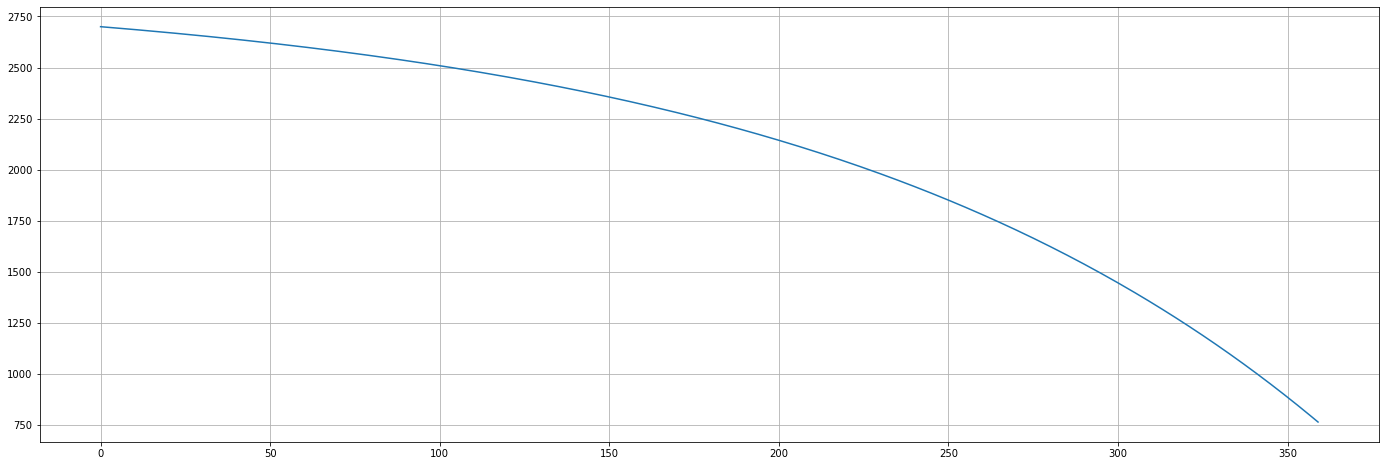

In [31]:
# 15 year
mortgage1 = Mortgage(300000, .078, 30)
years_owned = 10


y = mortgage1.find_true_monthly_cost_array()
x = np.arange(0, mortgage1.mortgage_length_months)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(24,8))
ax.plot(x, y)
ax.grid(True)

cst = sum(y[0:years_owned*12])
print(f'Total cost of ownership for {years_owned} years: ${cst:.2f}')
print(f"Net rental income needed per month to compensate: ${cst/(12*years_owned):.2f}")
print(f"Estimated monthly payment: ${mortgage1.pmt:.2f}")